# 卷积神经网络简介
卷积神经网络由一个或多个卷积层和顶端的全连通层（也可以使用1x1的卷积层作为最终的输出）组成一种前馈神经网络。一般的认为，卷积神经网络是由Yann LeCun大神在1989年提出的LeNet中首先被使用，但是由于当时的计算能力不够，并没有得到广泛的应用，到了1998年Yann LeCun及其合作者构建了更加完备的卷积神经网络LeNet-5并在手写数字的识别问题中取得成功，LeNet-5的成功使卷积神经网络的应用得到关注。LeNet-5沿用了LeCun (1989) 的学习策略并在原有设计中加入了池化层对输入特征进行筛选 。LeNet-5基本上定义了现代卷积神经网络的基本结构，其构筑中交替出现的卷积层-池化层被认为有效提取了输入图像的平移不变特征，使得对于特征的提取前进了一大步，所以我们一般的认为，Yann LeCun是卷积神经网络的创始人。

2006年后，随着深度学习理论的完善，尤其是计算能力的提升和参数微调（fine-tuning）等技术的出现，卷积神经网络开始快速发展，在结构上不断加深，各类学习和优化理论得到引入，2012年的AlexNet、2014年的VGGNet、GoogLeNet 和2015年的ResNet,使得卷积神经网络几乎成为了深度学习中图像处理方面的标配。


## 为什么要用卷积神经网络
对于计算机视觉来说，每一个图像是由一个个像素点构成，每个像素点有三个通道，分别代表RGB三种颜色(不计算透明度)，我们以手写识别的数据集MNIST举例，每个图像的是一个长宽均为28，channel为1的单色图像，如果使用全连接的网络结构，即，网络中的神经与相邻层上的每个神经元均连接，那就意味着我们的网络有28 * 28 =784个神经元（RGB3色的话还要*3），hidden层如果使用了15个神经元，需要的参数个数(w和b)就有：28 * 28 * 15 * 10 + 15 + 10=117625个，这个数量级到现在为止也是一个很恐怖的数量级，一次反向传播计算量都是巨大的，这还展示一个单色的28像素大小的图片，如果我们使用更大的像素，计算量可想而知。

In [2]:
import torch
torch.__version__

'1.10.2'

## 结构组成
上面说到传统的网络需要大量的参数，但是这些参数是否重复了呢，例如，我们识别一个人，只要看到他的眼睛，鼻子，嘴，还有脸基本上就知道这个人是谁了，只是用这些局部的特征就能做做判断了，并不需要所有的特征。
另外一点就是我们上面说的可以有效提取了输入图像的平移不变特征，就好像我们看到了这是个眼睛，这个眼镜在左边还是在右边他都是眼睛，这就是平移不变性。
我们通过卷积的计算操作来提取图像局部的特征，每一层都会计算出一些局部特征，这些局部特征再汇总到下一层，这样一层一层的传递下去，特征由小变大，最后在通过这些局部的特征对图片进行处理，这样大大提高了计算效率，也提高了准确度。
### 卷积层
#### 卷积计算
在介绍卷积层之前要先介绍一下卷积的计算，这里使用[知乎](https://www.zhihu.com/question/39022858)上的一张图片
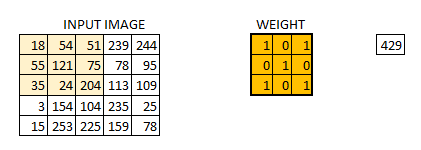
我们会定义一个权重矩阵，也就是我们说的W（一般对于卷积来说，称作卷积的核kernel也有有人称做过滤器filter），这个权重矩阵的大小一般为`3 * 3` 或者`5 * 5`，但是在LeNet里面还用到了比较大的`7 * 7`，现在已经很少见了，因为根据经验的验证，3和5是最佳的大小。
我们以图上所示的方式，我们在输入矩阵上使用我们的权重矩阵进行滑动，每滑动一步，将所覆盖的值与矩阵对应的值相乘，并将结果求和并作为输出矩阵的一项，依次类推直到全部计算完成。

上图所示，我们输入是一个 `5 * 5`的矩阵，通过使用一次`3 * 3`的卷积核计算得到的计算结果是一个`3 * 3`的新矩阵。
那么新矩阵的大小是如何计算的呢？
#### 卷积核大小 f
刚才已经说到了一个重要的参数，就是核的大小，我们这里用f来表示

#### 边界填充 (p)adding
我们看到上图，经过计算后矩阵的大小改变了，如果要使矩阵大小不改变呢，我们可以先对矩阵做一个填充，将矩阵的周围全部再包围一层，这个矩阵就变成了`7*7`,上下左右各加1，相当于 `5+1+1=7` 这时，计算的结果还是 `5 * 5`的矩阵，保证了大小不变，这里的p=1

#### 步长 (s)tride
从动图上我们能够看到，每次滑动只是滑动了一个距离，如果每次滑动两个距离呢？那就需要使用步长这个参数。

#### 计算公式

n为我们输入的矩阵的大小，$ \frac{n-f+2p}{s} +1 $ 向下取整

这个公式非常重要一定要记住

#### 卷积层
在每一个卷积层中我们都会设置多个核，每个核代表着不同的特征，这些特征就是我们需要传递到下一层的输出，而我们训练的过程就是训练这些不同的核。

### 激活函数
由于卷积的操作也是线性的，所以也需要进行激活，一般情况下，都会使用relu。

### 池化层（pooling）
池化层是CNN的重要组成部分，通过减少卷积层之间的连接，降低运算复杂程度，池化层的操作很简单，就想相当于是合并，我们输入一个过滤器的大小，与卷积的操作一样，也是一步一步滑动，但是过滤器覆盖的区域进行合并，只保留一个值。
合并的方式也有很多种，例如我们常用的两种取最大值maxpooling，取平均值avgpooling

池化层的输出大小公式也与卷积层一样，由于没有进行填充，所以p=0，可以简化为
$ \frac{n-f}{s} +1 $

### dropout层
dropout是2014年 Hinton 提出防止过拟合而采用的trick，增强了模型的泛化能力
Dropout（随机失活）是指在深度学习网络的训练过程中，按照一定的概率将一部分神经网络单元暂时从网络中丢弃，相当于从原始的网络中找到一个更瘦的网络，说的通俗一点，就是随机将一部分网络的传播掐断，听起来好像不靠谱，但是通过实际测试效果非常好。
有兴趣的可以去看一下原文[Dropout: A Simple Way to Prevent Neural Networks from Overfitting](http://jmlr.org/papers/v15/srivastava14a.html)这里就不详细介绍了。

### 全连接层
全链接层一般是作为最后的输出层使用，卷积的作用是提取图像的特征，最后的全连接层就是要通过这些特征来进行计算，输出我们所要的结果了，无论是分类，还是回归。

我们的特征都是使用矩阵表示的，所以再传入全连接层之前还需要对特征进行压扁，将他这些特征变成一维的向量，如果要进行分类的话，就是用sofmax作为输出，如果要是回归的话就直接使用linear即可。

以上就是卷积神经网络几个主要的组成部分，下面我们介绍一些经典的网络模型
## 经典模型

### LeNet-5
1998， Yann LeCun 的 LeNet5 [官网](http://yann.lecun.com/exdb/lenet/index.html)

卷积神经网路的开山之作，麻雀虽小，但五脏俱全，卷积层、pooling层、全连接层，这些都是现代CNN网络的基本组件
   - 用卷积提取空间特征；
   - 由空间平均得到子样本；
   - 用 tanh 或 sigmoid 得到非线性；
   - 用 multi-layer neural network（MLP）作为最终分类器；
   - 层层之间用稀疏的连接矩阵，以避免大的计算成本。
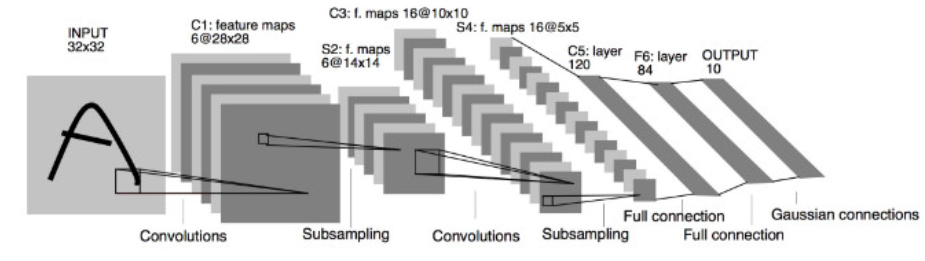

输入：图像Size为32*32。这要比mnist数据库中最大的字母(28*28)还大。这样做的目的是希望潜在的明显特征，如笔画断续、角点能够出现在最高层特征监测子感受野的中心。

输出：10个类别，分别为0-9数字的概率

1. C1层是一个卷积层，有6个卷积核（提取6种局部特征），核大小为5 * 5，针对一张32 * 32的灰度图像会输出6个28 * 28的特征映射。
2. S2层是pooling层，下采样（区域:2 * 2 ），步长为2，将6个28 * 28的特征映射转化为6个14 * 14的特征映射，降低网络训练参数及模型的过拟合程度。
3. C3层是第二个卷积层，使用16个卷积核，核大小:5 * 5 提取特征，不使用填补操作，将6个14 * 14的特征映射卷积运算后输出16个10 * 10的特征映射
4. S4层也是一个pooling层，区域:2*2，步长为2，从而将16个10 * 10的特征映射转化为16个5 * 5的特征映射
5. C5层是最后一个卷积层，卷积核大小:5 * 5  卷积核种类:120,神经元数量为120
6. 最后使用全连接层，将C5的120个特征进行分类，最后输出0-9的概率，神经元数量为84

以下代码来自[官方教程](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html)

In [3]:
import torch.nn as nn
import torch.nn.functional as F
class LeNet5(nn.Module):

    def __init__(self):
        super(LeNet5, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # 这里论文上写的是conv,官方教程用了线性层
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = LeNet5()
print(net)

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### AlexNet
2012，Alex Krizhevsky
可以算作LeNet的一个更深和更广的版本，可以用来学习更复杂的对象 [论文](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)
   - 用rectified linear units（ReLU）得到非线性；
   - 使用 dropout 技巧在训练期间有选择性地忽略单个神经元，来减缓模型的过拟合；
   - 重叠最大池，避免平均池的平均效果；
   - 使用 GPU NVIDIA GTX 580 可以减少训练时间，这比用CPU处理快了 10 倍，所以可以被用于更大的数据集和图像上。
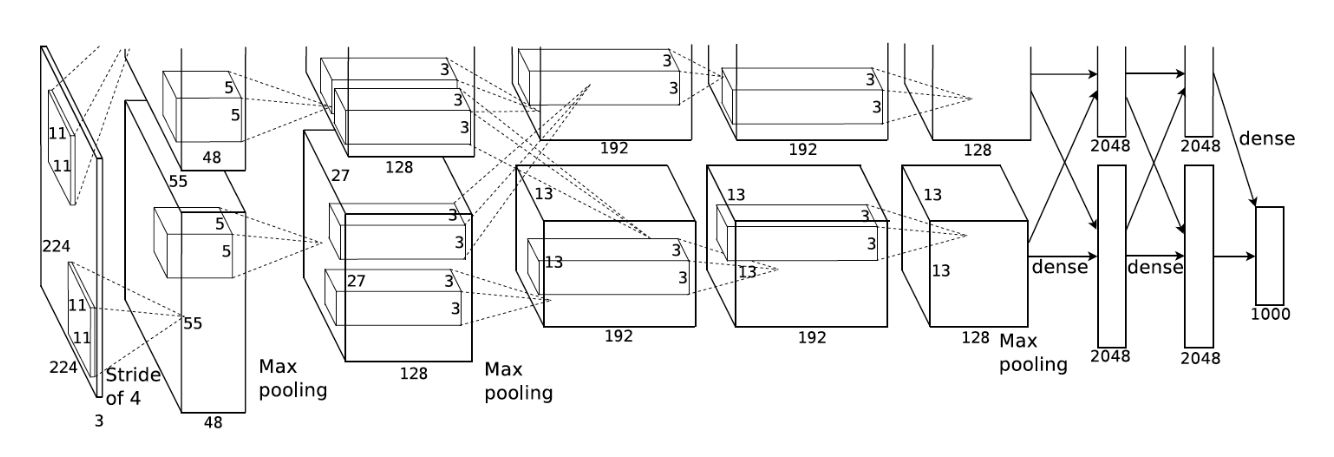
虽然 AlexNet只有8层，但是它有60M以上的参数总量，Alexnet有一个特殊的计算层，LRN层，做的事是对当前层的输出结果做平滑处理，这里就不做详细介绍了，
Alexnet的每一阶段（含一次卷积主要计算的算作一层）可以分为8层：

1. con - relu - pooling - LRN ：
要注意的是input层是227*227，而不是paper里面的224，这里可以算一下，主要是227可以整除后面的conv1计算，224不整除。如果一定要用224可以通过自动补边实现，不过在input就补边感觉没有意义，补得也是0，这就是我们上面说的公式的重要性。

2. conv - relu - pool - LRN ：
group=2，这个属性强行把前面结果的feature map分开，卷积部分分成两部分做

3. conv - relu

4. conv - relu

5. conv - relu - pool

6. fc - relu - dropout ：
dropout层，在alexnet中是说在训练的以1/2概率使得隐藏层的某些neuron的输出为0，这样就丢到了一半节点的输出，BP的时候也不更新这些节点，防止过拟合。

7. fc - relu - dropout 

8. fc - softmax 

在Pytorch的vision包中是包含Alexnet的官方实现的，我们直接使用官方版本看下网络

In [4]:
import torchvision
model = torchvision.models.alexnet(pretrained=False) #我们不下载预训练权重
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### VGG
2015，牛津的 VGG。[论文](https://arxiv.org/pdf/1409.1556.pdf)

   - 每个卷积层中使用更小的 3×3 filters，并将它们组合成卷积序列
   - 多个3×3卷积序列可以模拟更大的接收场的效果
   - 每次的图像像素缩小一倍，卷积核的数量增加一倍
 
VGG有很多个版本，也算是比较稳定和经典的model。它的特点也是连续conv多计算量巨大，这里我们以VGG16为例.[图片来源](https://www.cs.toronto.edu/~frossard/post/vgg16/)
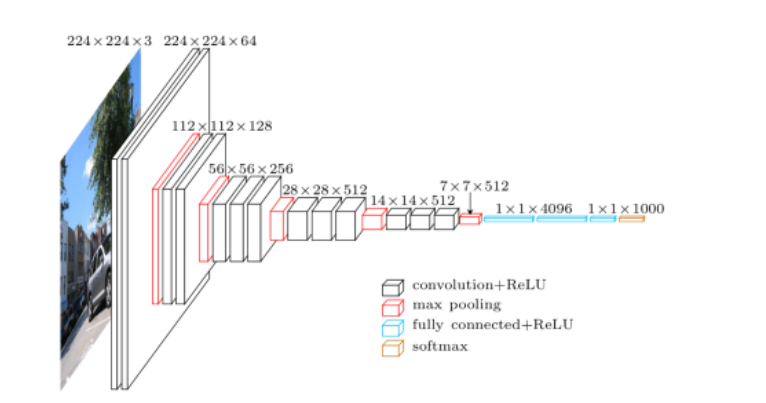
VGG清一色用小卷积核，结合作者和自己的观点，这里整理出小卷积核比用大卷积核的优势：

根据作者的观点，input8 -> 3层conv3x3后，output=2，等同于1层conv7x7的结果； input=8 -> 2层conv3x3后，output=2，等同于2层conv5x5的结果

卷积层的参数减少。相比5x5、7x7和11x11的大卷积核，3x3明显地减少了参数量

通过卷积和池化层后，图像的分辨率降低为原来的一半，但是图像的特征增加一倍，这是一个十分规整的操作:
分辨率由输入的224->112->56->28->14->7，
特征从原始的RGB3个通道-> 64 ->128 -> 256 -> 512

这为后面的网络提供了一个标准，我们依旧使用Pytorch官方实现版本来查看

In [5]:
import torchvision
model = torchvision.models.vgg16(pretrained=False) #我们不下载预训练权重
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### GoogLeNet (Inception)
2014，Google Christian Szegedy [论文](https://arxiv.org/abs/1512.00567)
- 使用1×1卷积块（NiN）来减少特征数量，这通常被称为“瓶颈”，可以减少深层神经网络的计算负担。
- 每个池化层之前，增加 feature maps，增加每一层的宽度来增多特征的组合性

googlenet最大的特点就是包含若干个inception模块，所以有时候也称作 inception net。
googlenet虽然层数要比VGG多很多，但是由于inception的设计，计算速度方面要快很多。

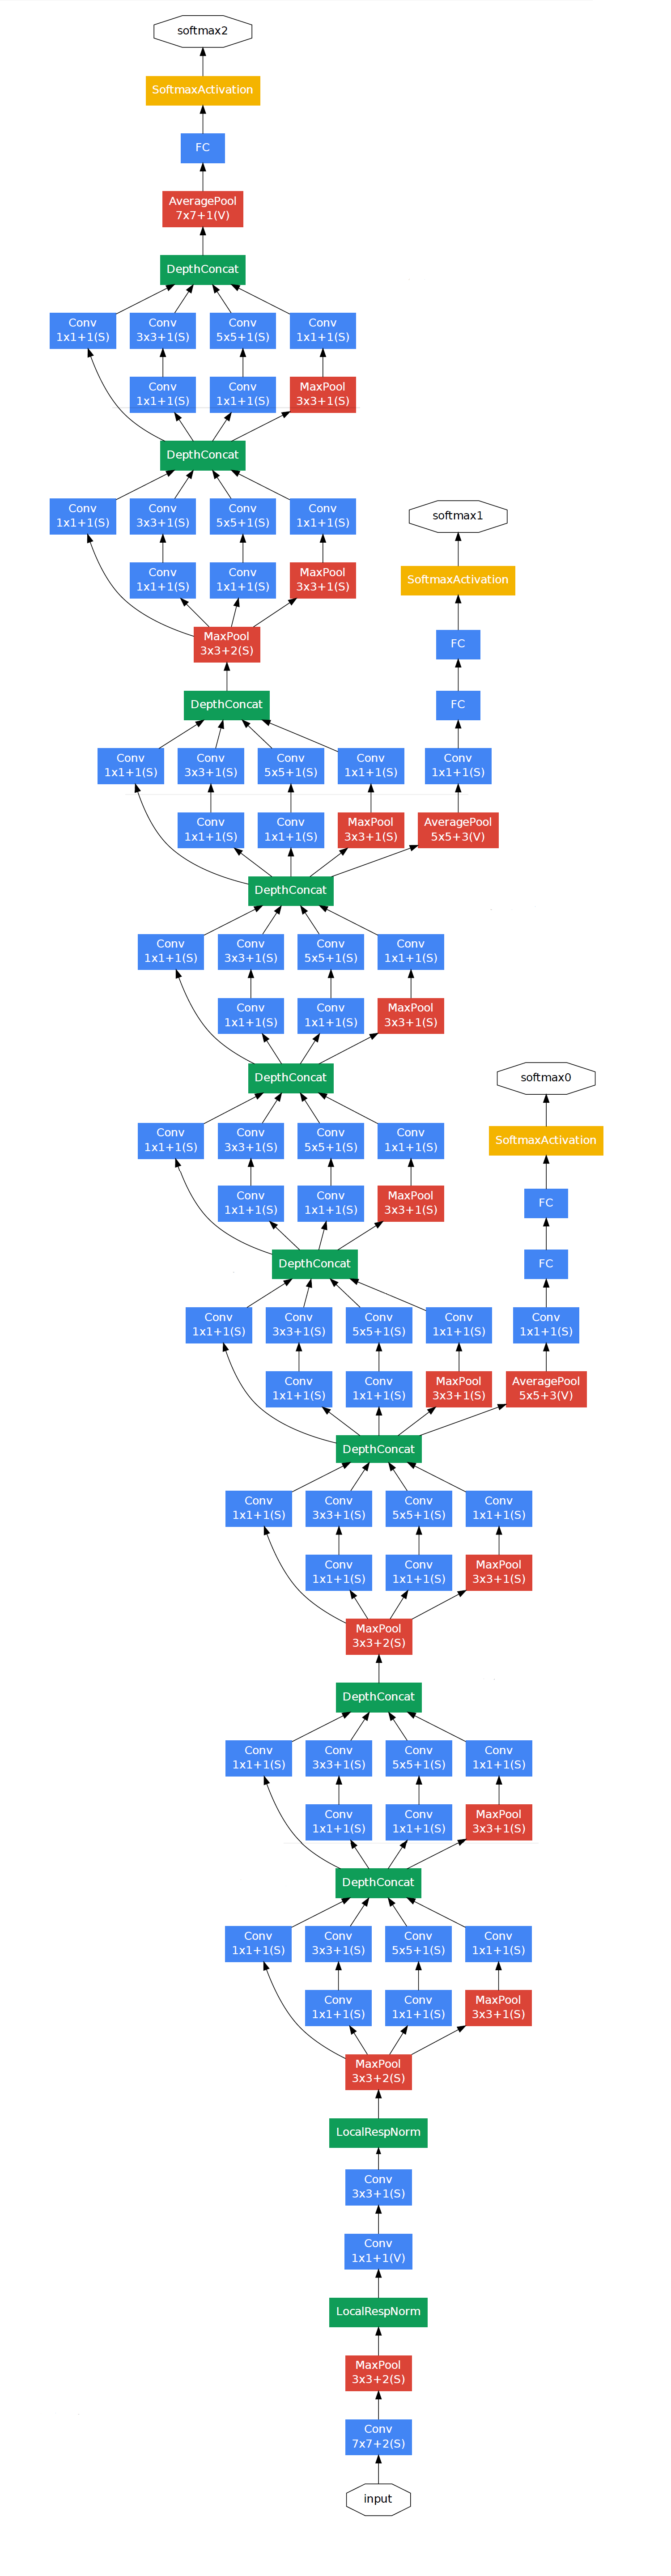

不要被这个图吓到，其实原理很简单

Inception架构的主要思想是找出如何让已有的稠密组件接近与覆盖卷积视觉网络中的最佳局部稀疏结构。现在需要找出最优的局部构造，并且重复几次。之前的一篇文献提出一个层与层的结构，在最后一层进行相关性统计，将高相关性的聚集到一起。这些聚类构成下一层的单元，且与上一层单元连接。假设前面层的每个单元对应于输入图像的某些区域，这些单元被分为滤波器组。在接近输入层的低层中，相关单元集中在某些局部区域，最终得到在单个区域中的大量聚类，在最后一层通过1x1的卷积覆盖。

上面的话听起来很生硬，其实解释起来很简单：每一模块我们都是用若干个不同的特征提取方式，例如 3x3卷积，5x5卷积，1x1的卷积，pooling等，都计算一下，最后再把这些结果通过Filter Concat来进行连接，找到这里面作用最大的。而网络里面包含了许多这样的模块，这样不用我们人为去判断哪个特征提取方式好，网络会自己解决（是不是有点像AUTO ML），在Pytorch中实现了InceptionA-E，还有InceptionAUX 模块。



In [7]:
# inception_v3需要scipy，所以没有安装的话pip install scipy 一下
import torchvision
model = torchvision.models.inception_v3(pretrained=False) #我们不下载预训练权重
print(model)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

### ResNet
2015，Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun [论文](https://arxiv.org/abs/1512.03385)
Kaiming He 何凯明（音译）这个大神大家一定要记住，现在很多论文都有他参与(mask rcnn, focal loss)，Jian Sun孙剑老师就不用说了，现在旷视科技的首席科学家。
刚才的GoogLeNet已经很深了，ResNet可以做到更深，通过残差计算，可以训练超过1000层的网络，俗称跳连接

#### 退化问题
网络层数增加，但是在训练集上的准确率却饱和甚至下降了。这个不能解释为overfitting，因为overfit应该表现为在训练集上表现更好才对。这个就是网络退化的问题，退化问题说明了深度网络不能很简单地被很好地优化

#### 残差网络的解决办法
深层网络的后面那些层是恒等映射，那么模型就退化为一个浅层网络。那现在要解决的就是学习恒等映射函数了。让一些层去拟合一个潜在的恒等映射函数H(x) = x，比较困难。如果把网络设计为H(x) = F(x) + x。我们可以转换为学习一个残差函数F(x) = H(x) - x。 只要F(x)=0，就构成了一个恒等映射H(x) = x. 而且，拟合残差肯定更加容易。

以上又很不好理解，继续解释下，先看图：
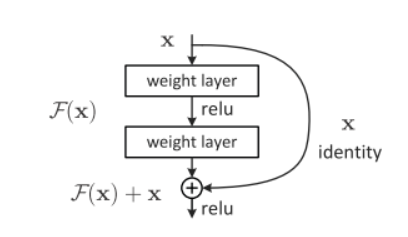

我们在激活函数前将上一层（或几层）的输出与本层计算的输出相加，将求和的结果输入到激活函数中做为本层的输出，引入残差后的映射对输出的变化更敏感，其实就是看本层相对前几层是否有大的变化，相当于是一个差分放大器的作用。图中的曲线就是残差中的shoutcut，他将前一层的结果直接连接到了本层，也就是俗称的跳连接。

我们以经典的resnet18来看一下网络结构 [图片来源](https://www.researchgate.net/figure/Proposed-Modified-ResNet-18-architecture-for-Bangla-HCR-In-the-diagram-conv-stands-for_fig1_323063171)

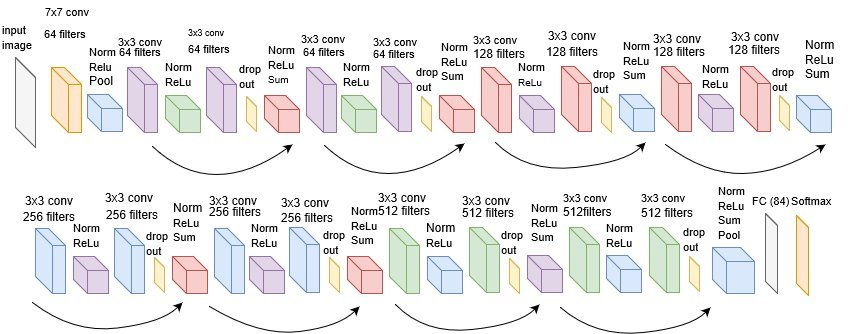

In [8]:
import torchvision
model = torchvision.models.resnet18(pretrained=False) #我们不下载预训练权重
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

那么我们该如何选择网络呢？
[来源](https://www.researchgate.net/figure/Comparison-of-popular-CNN-architectures-The-vertical-axis-shows-top-1-accuracy-on_fig2_320084139)
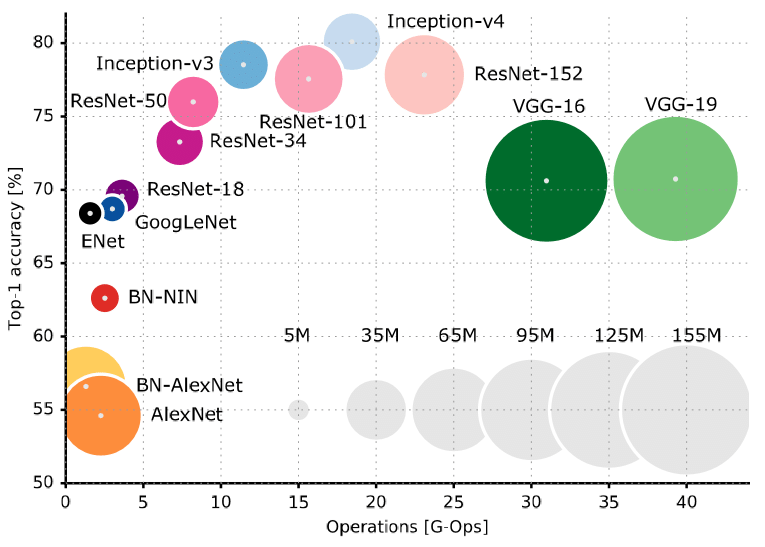
以上表格可以清楚的看到准确率和计算量之间的对比。我的建议是，小型图片分类任务，resnet18基本上已经可以了，如果真对准确度要求比较高，再选其他更好的网络架构。

**另外有句俗话叫：穷人只能AlexNet，富人才用Res**